<a href="https://colab.research.google.com/github/JUANCARLOST-LAB/Data-Science/blob/main/Modelo%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
#importamos csv
df = pd.read_csv('life_expectancy.csv')

In [ ]:
#Verificamos que no haya nulos
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
#Checamos que solo haya datos numericos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2442 non-null   object 
 1   Year                             2442 non-null   int64  
 2   Status                           2442 non-null   object 
 3   Life expectancy                  2442 non-null   float64
 4   Adult Mortality                  2442 non-null   float64
 5   infant deaths                    2442 non-null   int64  
 6   Alcohol                          2442 non-null   float64
 7   percentage expenditure           2442 non-null   float64
 8   Measles                          2442 non-null   int64  
 9    BMI                             2442 non-null   float64
 10  under-five deaths                2442 non-null   int64  
 11  Polio                            2442 non-null   float64
 12  Total expenditure   

In [ ]:
#Checamos columna country
df['Country'].value_counts()

Afghanistan               16
Albania                   16
Nicaragua                 15
Morocco                   15
Mozambique                15
                          ..
Bosnia and Herzegovina     9
Antigua and Barbuda        9
Bhutan                     4
Grenada                    4
Turkmenistan               4
Name: Country, Length: 171, dtype: int64

Hay muchos tipos por lo que decidiremos borrar la columna

In [ ]:
df.drop(['Country'], axis=1, inplace=True)

In [ ]:
#Checamos Status
df['Status'].value_counts()

Developing    2007
Developed      435
Name: Status, dtype: int64

Mapearemos los valores de status

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
one = OneHotEncoder(drop='first', sparse=False)
one.fit(df[['Status']])
transformed = one.transform(df[['Status']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
one.get_feature_names_out()

array(['Status_Developing'], dtype=object)

In [ ]:
df_new = pd.DataFrame(transformed, columns=one.get_feature_names_out())

In [ ]:
data = pd.concat([df, df_new], axis=1).drop(['Status'], axis=1)
data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,1.0
1,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,1.0
2,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,1.0
3,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,1.0
4,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,1.0


In [ ]:
#Ahora seleccionaremos aquellas columnas que en estudios anteriores vimos que tenian alta correlacion to la esperanza de vida
X = data[['Schooling','Income composition of resources',' HIV/AIDS','GDP',' BMI ']]
y = data[['Life expectancy']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The Mean Squared Error is {mse} and the r2_score is {r2}')

The Mean Squared Error is 11.396980725983031 and the r2_score is 0.8740844271454786


Podemos ver que mejoro con respecto a cuando realizamos un pca

In [ ]:
import matplotlib.pyplot as plt
y_pred = pd.Series(y_pred.flatten())
y_test=y_test.reset_index()
y_pred = y_pred.reset_index()
table2 = pd.concat([y_test, y_pred], axis=1).drop(['index'], axis=1).rename({'0':'Predicted'}).sort_values(by='Life expectancy', ascending=True)

In [ ]:
table2

,Life expectancy,0
421,43.3,54.769506
430,45.3,38.530683
273,45.5,43.148726
414,45.6,37.755911
325,45.9,49.670052
...,...,...
63,86.0,80.718814
486,86.0,81.411697
420,88.0,79.223971
314,88.0,79.405187


<Axes: ylabel='Life expectancy'>

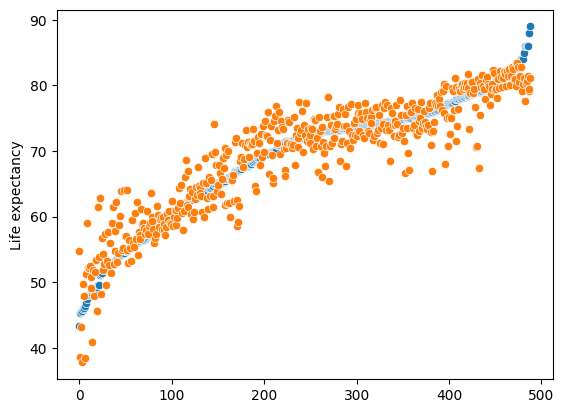

In [ ]:
import seaborn as sns
sns.scatterplot(data=table2, x=np.arange(len(y_test)), y='Life expectancy')
sns.scatterplot(data=table2, x=np.arange(len(y_test)), y=0)

Hay algunos outiers que pudimos eliminar aunque considero que el modelo puede mejorar

## Feature Engineering


Realizaremos ahora un feature selection para seleccionar las mejores variables y posteriormente probaremos el modelo con esas columnas y despues con un PCA para evaluar su desempeño

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
#Realizaremos un feature selection, queremos seleccionar entre 8 y 12 columnas 
scores = []
X = data.drop(['Life expectancy'], axis=1)
y=data[['Life expectancy']]
for k in range(8, 13):
  lrfs = LinearRegression()
  sfs1 = sfs(lrfs, k_features=k, forward=True, verbose=2, scoring="neg_mean_squared_error", cv=4)
  sfs1 = sfs1.fit(X, y)
  #Obtenemos las columnas que tienen mayor correlacion con el target Life Expectancy
  columns = list(sfs1.k_feature_names_)
  #Procedemos a entrenar el modelo
  lr2 = LinearRegression()
  X_new = X[columns]
  #Dividimos en train y test
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
  lr2.fit(X_train, y_train)
  y_pred = lr2.predict(X_test)
  #Evaluamos el modelo
  score = mean_squared_error(y_test, y_pred)
  scores.append([k, score])



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished

[2023-04-11 15:54:01] Features: 1/8 -- score: -19.053724053547093[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s finished

[2023-04-11 15:54:02] Features: 2/8 -- score: -12.66142488456882[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished

[2023-04-11 15:54:03] Features: 3/8 -- score: -11.153838668574307[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
scores

[[8, 9.709056995901543],
 [9, 9.670505370844204],
 [10, 9.683091108863794],
 [11, 9.687598993356987],
 [12, 9.703861294290544]]

Podemos notar que los minimos se alcanzan cuando seleccionamos 9 o 10 columnas, seleccionaremos 10

In [ ]:
lrfs = LinearRegression()
sfs1 = sfs(lrfs, k_features=10, forward=True, verbose=2, scoring="neg_mean_squared_error", cv=4)

In [ ]:
X = data.drop(['Life expectancy'], axis=1)
y=data[['Life expectancy']]

In [ ]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished

[2023-04-11 15:54:45] Features: 1/10 -- score: -19.053724053547093[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2023-04-11 15:54:46] Features: 2/10 -- score: -12.66142488456882[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2023-04-11 15:54:46] Features: 3/10 -- score: -11.153838668574307[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [ ]:
#Obtenemos las columnas que tienen mayor correlacion con el target Life Expectancy
columns = list(sfs1.k_feature_names_)
columns

['Adult Mortality',
 'Alcohol',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'Income composition of resources',
 'Schooling',
 'Status_Developing']

In [ ]:
#Procedemos a entrenar el modelo
lr2 = LinearRegression()
X_new = X[columns]
#Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamos el modelo y predecimos
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)

In [ ]:
#Evaluamos el modelo
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f'The Mean Squared Error is {mse} and the r2 score is {r2}')

The Mean Squared Error is 9.683091108863794 and the r2 score is 0.8930197397635818


In [ ]:
y_pred = pd.Series(y_pred.flatten())
y_test=y_test.reset_index()
y_pred = y_pred.reset_index()
table2 = pd.concat([y_test, y_pred], axis=1).drop(['index'], axis=1).rename({'0':'Predicted'}).sort_values(by='Life expectancy', ascending=True)

<Axes: ylabel='Life expectancy'>

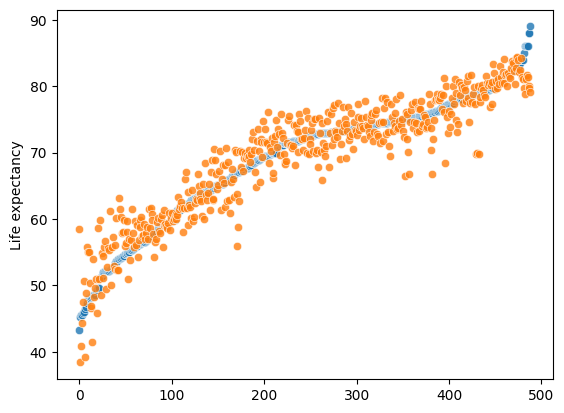

In [ ]:
sns.scatterplot(data=table2, x=np.arange(len(y_test)), y='Life expectancy', alpha=0.8)
sns.scatterplot(data=table2, x=np.arange(len(y_test)), y=0, alpha=0.8)

Nuestro modelo mejoro, teniendo un r2 de 0.89

In [ ]:
#Normalizaremos datos
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
#seleccion de columnas normalizadas
normal_cols = []

for col in X_train.columns:

  k2, p_value = stats.normaltest(X_new[col])
  if p_value > 0.05:
    normal_cols.append(col)
  
  print(f"columna {col} ---- Estadístico = {k2}, p-value = {p_value}")

#Seleccionamos las columnas no normalizadas para aplicar un robust scaler
not_stander = list(set(X_train.columns) - set(normal_cols))

columna Adult Mortality ---- Estadístico = 552.0427959364473, p-value = 1.3348423447546153e-120
columna Alcohol ---- Estadístico = 303.8848313755774, p-value = 1.0286018468114396e-66
columna  BMI  ---- Estadístico = 5701.186699381776, p-value = 0.0
columna Polio ---- Estadístico = 1038.7198168743134, p-value = 2.7852080643114418e-226
columna Total expenditure ---- Estadístico = 37.09976805601951, p-value = 8.787953023118347e-09
columna Diphtheria  ---- Estadístico = 1045.6206083973523, p-value = 8.838321684818231e-228
columna  HIV/AIDS ---- Estadístico = 2456.96523033676, p-value = 0.0
columna Income composition of resources ---- Estadístico = 256.4212742961015, p-value = 2.0836643690800446e-56
columna Schooling ---- Estadístico = 30.07764996351188, p-value = 2.9425326885614414e-07
columna Status_Developing ---- Estadístico = 629.8909058579601, p-value = 1.66313572462033e-137


In [ ]:
normal_cols

[]

In [ ]:
rs = RobustScaler()
X_train[not_stander] = rs.fit_transform(X_train[not_stander])

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)

In [ ]:
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test[not_stander] = rs.transform(X_test[not_stander])

In [ ]:
X_test = pca.transform(X_test)

In [ ]:
y_pred = lr3.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f'The Mean Squared Error is {mse} and the r2 score is {r2}')

The Mean Squared Error is 17.6211490768307 and the r2 score is 0.8053188705228174


In [ ]:
y_pred = pd.Series(y_pred.flatten())
y_test=y_test.reset_index()
y_pred = y_pred.reset_index()
table2 = pd.concat([y_test, y_pred], axis=1).drop(['index'], axis=1).rename({'0':'Predicted'}).sort_values(by='Life expectancy', ascending=True)

<Axes: ylabel='Life expectancy'>

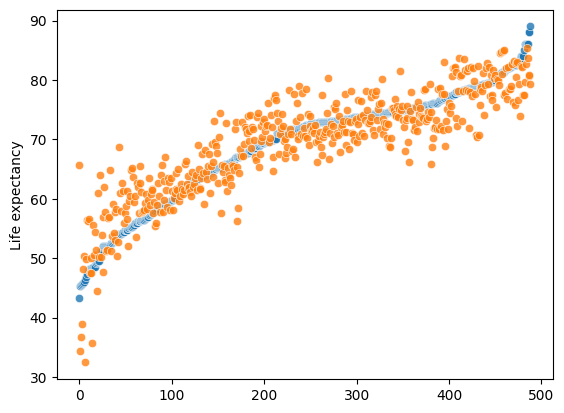

In [ ]:
sns.scatterplot(data=table2, x=np.arange(len(y_test)), y='Life expectancy', alpha=0.8)
sns.scatterplot(data=table2, x=np.arange(len(y_test)), y=0, alpha=0.8)